In [21]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_auc_score, mean_squared_error, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('CreditDataset.csv')

In [3]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [5]:
# Pisahkan fitur dan target
X = df.drop(columns=['Class'])  # Semua kolom kecuali 'Class'
y = df['Class']  # Kolom target

In [6]:
# Menentukan kolom kategoris dan numerik
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Kolom Kategoris:", list(categorical_columns))
print("Kolom Numerik:", list(numerical_columns))


Kolom Kategoris: ['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17', 'x19', 'x20']
Kolom Numerik: ['x2', 'x5', 'x8', 'x11', 'x13', 'x16', 'x18', 'Class']


In [7]:
# Encode semua kolom kategoris
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

Prompt : Buatkan saya visualisasi dari dataset Credit_Dataset.csv

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_32212\718092134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='viridis')


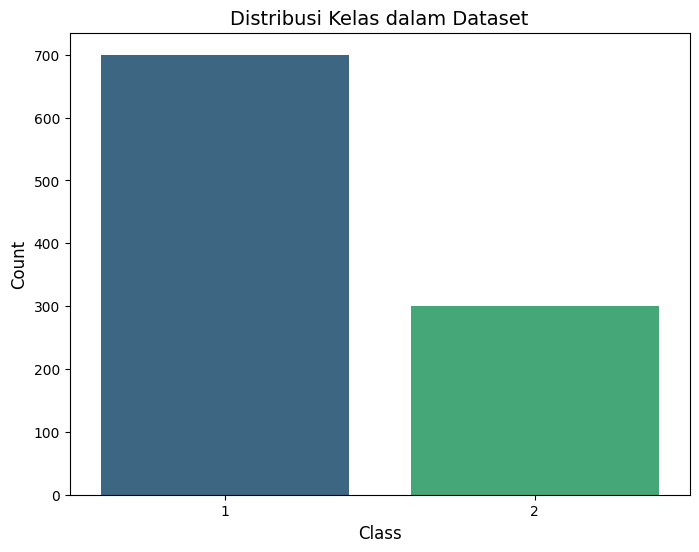

In [8]:
# Melihat distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', palette='viridis')
plt.title('Distribusi Kelas dalam Dataset', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

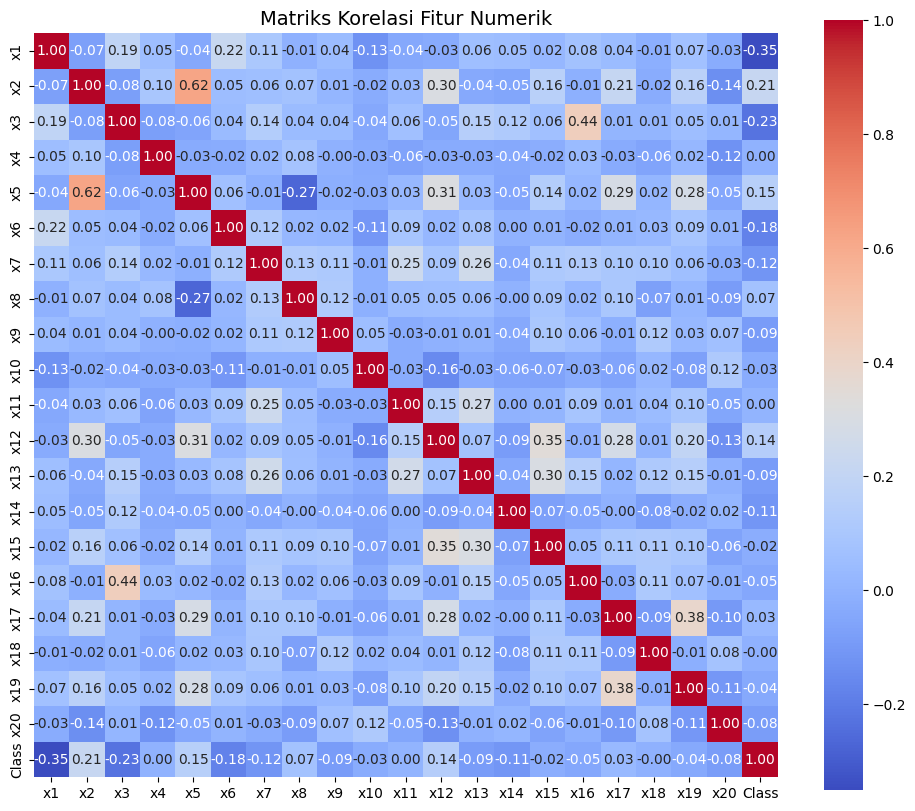

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur Numerik', fontsize=14)
plt.show()

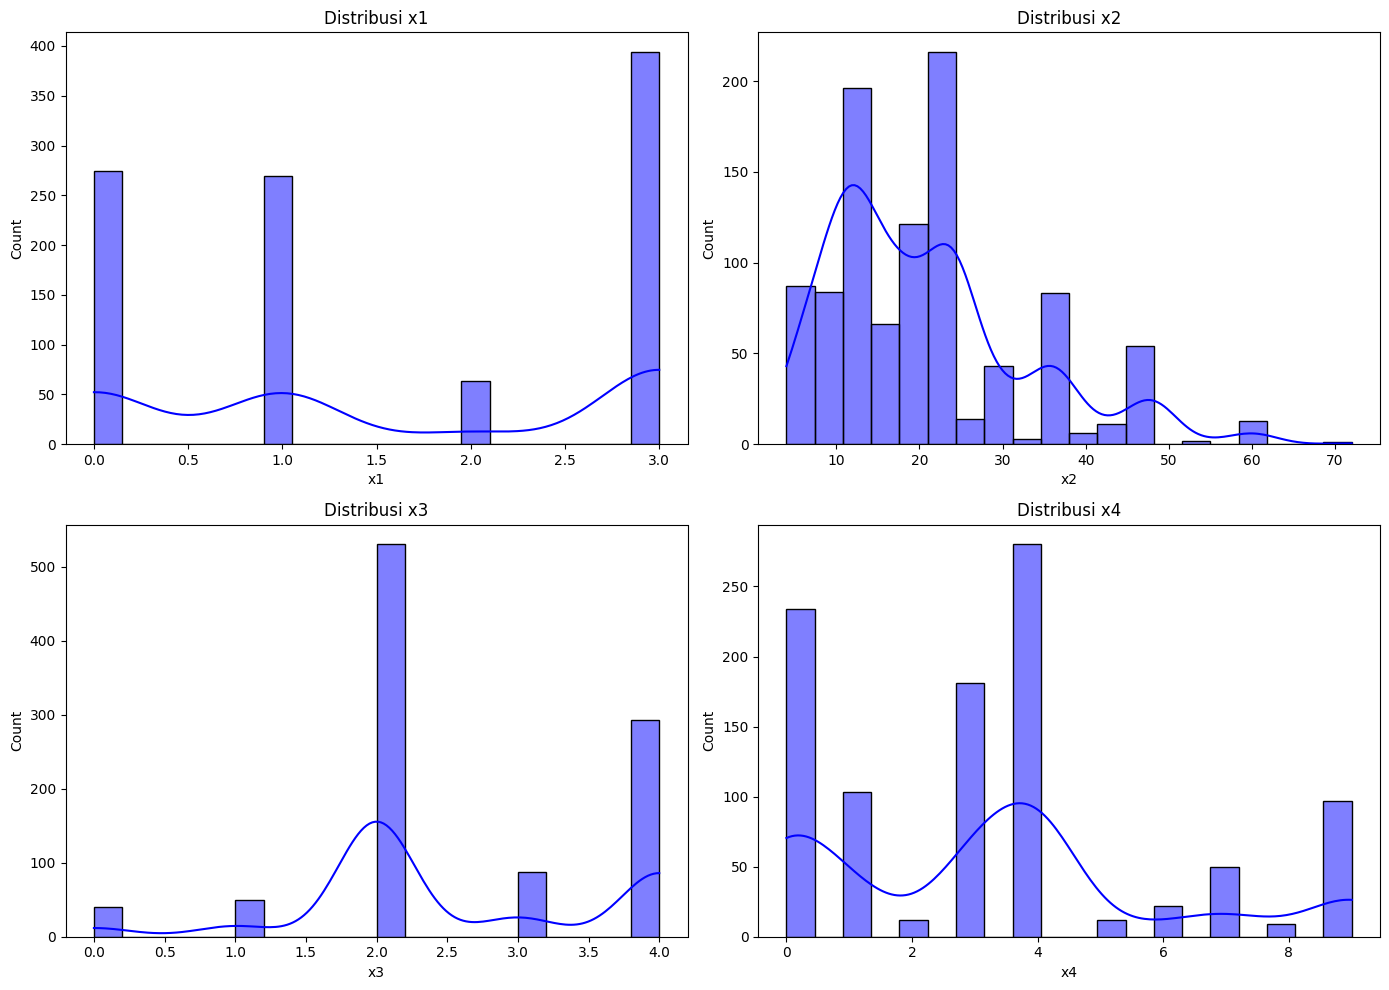

In [10]:
# Distribusi beberapa fitur numerik
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:4], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribusi {col}', fontsize=12)
plt.tight_layout()
plt.show()

Prompt : sebagai deep learning setelah melakukan visualisasi diatas, buatkan saya model svm regression untuk dataset tersebut.

In [11]:
# Encode semua kolom kategoris di dalam X
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

In [12]:
# Split data ulang setelah encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Parameter grid untuk SVR dengan kernel linear (svr)
param_grid_svr = {
    'C': [0.1, 1, 10, 100, 1000]  # Kurangi pilihan C
}

# Inisialisasi model SVR
svr = SVR(kernel='linear')

# Grid Search dengan cross-validation 3-fold
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search_svr.fit(X_train_scaled, y_train)

# Menampilkan hasil Grid Search untuk SVR
print("SVR Best parameters:", grid_search_svr.best_params_)
print("SVR Best cross-validation MSE:", grid_search_svr.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
SVR Best parameters: {'C': 10}
SVR Best cross-validation MSE: -0.19832562742564525


In [16]:
# Menggunakan model terbaik
best_svr = grid_search_svr.best_estimator_

# Prediksi pada data uji
y_pred = best_svr.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model Terbaik:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Evaluasi Model Terbaik:
Mean Squared Error (MSE): 0.1856
Mean Absolute Error (MAE): 0.3213
R² Score: 0.1164


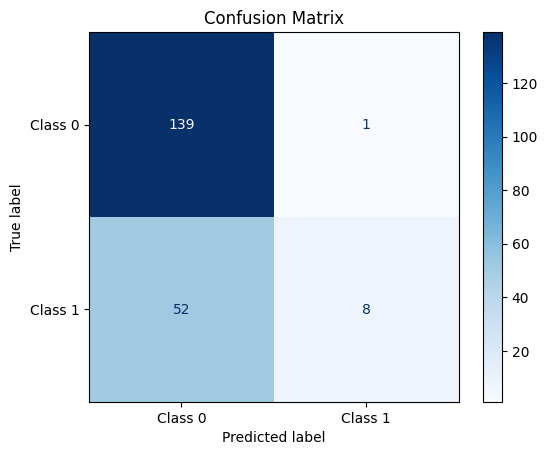

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      0.99      0.84       140
     Class 1       0.89      0.13      0.23        60

    accuracy                           0.73       200
   macro avg       0.81      0.56      0.54       200
weighted avg       0.78      0.73      0.66       200



In [20]:
# Konversi prediksi regresi ke kelas dengan threshold sederhana
y_pred_class = [1 if pred >= 1.5 else 0 for pred in y_pred]
y_test_class = [1 if true >= 1.5 else 0 for true in y_test]

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
class_report = classification_report(y_test_class, y_pred_class, target_names=['Class 0', 'Class 1'])

# Print classification report
print("Classification Report:")
print(class_report)

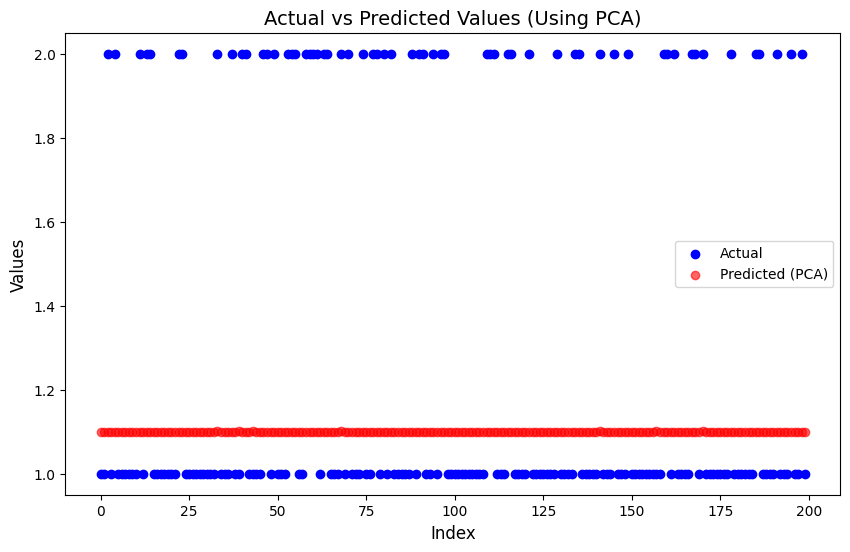

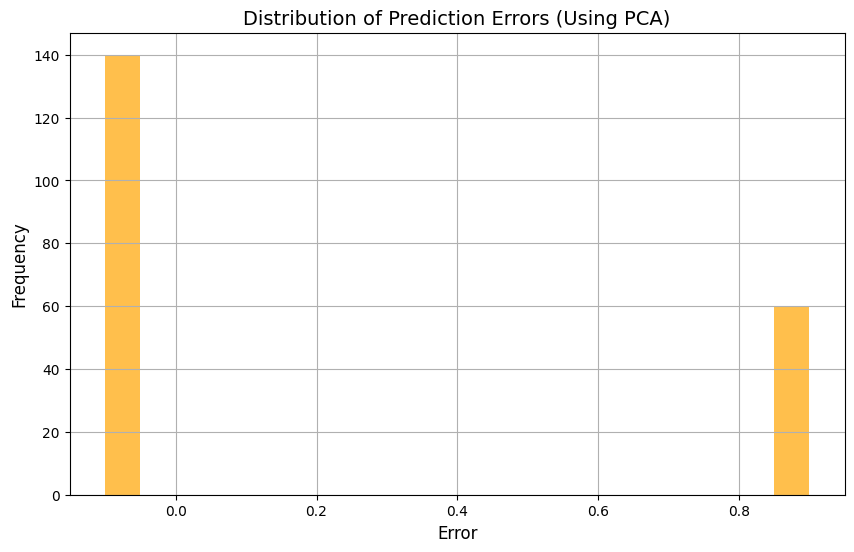

In [23]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mengurangi dimensi data menjadi 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Latih ulang model SVR (regresi) dengan data hasil PCA
best_svr.fit(X_train_pca, y_train)

# Prediksi pada data uji dengan PCA
y_pred_pca = best_svr.predict(X_test_pca)

# Visualisasi hasil PCA: Nilai aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_pca)), y_pred_pca, color='red', alpha=0.6, label='Predicted (PCA)')
plt.title("Actual vs Predicted Values (Using PCA)", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend()
plt.show()

# Visualisasi distribusi error setelah PCA
errors_pca = y_test - y_pred_pca

plt.figure(figsize=(10, 6))
plt.hist(errors_pca, bins=20, color='orange', alpha=0.7)
plt.title("Distribution of Prediction Errors (Using PCA)", fontsize=14)
plt.xlabel("Error", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid()
plt.show()